In [ ]:
Student Name: Zhibing Liu
Student Number: 1010506515

### **Load the Library that may used in this code**

In [ ]:
# Import all the library that we may used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind


### **Clean the dataset for further use**

In [ ]:
# Load the dataset
# Read the input dataset file
data = pd.read_excel('../INF2178_A1_data.xlsx')
data.head()


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [ ]:
# We want to keep the column that we want
data = data.drop(columns=["ORGANIZATION_NAME","PROGRAM_ID","PROGRAM_NAME","OVERNIGHT_SERVICE_TYPE","PROGRAM_AREA","CAPACITY_TYPE",])
data.head()

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,Families,Emergency,74,NaN,NaN,29.0,26.0
1,2021-01-01,Mixed Adult,Emergency,3,NaN,NaN,3.0,3.0
2,2021-01-01,Men,Emergency,24,NaN,NaN,28.0,23.0
3,2021-01-01,Mixed Adult,Emergency,25,NaN,NaN,17.0,17.0
4,2021-01-01,Women,Emergency,13,NaN,NaN,14.0,13.0


In [ ]:
# One DataFrame will contain the bed-related variables
# Along with the other relevant information from the dataset
beds_data = data.dropna(subset=['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'])[['OCCUPANCY_DATE', 'SECTOR', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS']].copy()
beds_data.head()


,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
5,2021-01-01,Mixed Adult,Emergency,6,8.0,6.0
10,2021-01-01,Men,Emergency,22,24.0,22.0
11,2021-01-01,Men,Emergency,8,12.0,8.0
21,2021-01-01,Men,Transitional,10,12.0,10.0
25,2021-01-01,Families,Emergency,11,12.0,11.0


In [ ]:
# One DataFrame will contain the room-related variables
# Along with the same set of relevant information.
rooms_data = data.dropna(subset=['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'])[['OCCUPANCY_DATE', 'SECTOR', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']].copy()
rooms_data.head()


,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,Families,Emergency,74,29.0,26.0
1,2021-01-01,Mixed Adult,Emergency,3,3.0,3.0
2,2021-01-01,Men,Emergency,24,28.0,23.0
3,2021-01-01,Mixed Adult,Emergency,25,17.0,17.0
4,2021-01-01,Women,Emergency,13,14.0,13.0


### **Add shelter occupancy rate to the table**

In [ ]:
# Add a column called shelter_program_occupancy_rate to the bed data
beds_data['shelter_program_occupancy_rate'] = beds_data['OCCUPIED_BEDS'] / beds_data['CAPACITY_ACTUAL_BED']
beds_data.head()


,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,shelter_program_occupancy_rate
5,2021-01-01,Mixed Adult,Emergency,6,8.0,6.0,0.750000
10,2021-01-01,Men,Emergency,22,24.0,22.0,0.916667
11,2021-01-01,Men,Emergency,8,12.0,8.0,0.666667
21,2021-01-01,Men,Transitional,10,12.0,10.0,0.833333
25,2021-01-01,Families,Emergency,11,12.0,11.0,0.916667


In [ ]:
# Add a column called shelter_program_occupancy_rate to the room data
rooms_data['shelter_program_occupancy_rate'] = rooms_data['OCCUPIED_ROOMS'] / rooms_data['CAPACITY_ACTUAL_ROOM']
rooms_data.head()

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,shelter_program_occupancy_rate
0,2021-01-01,Families,Emergency,74,29.0,26.0,0.896552
1,2021-01-01,Mixed Adult,Emergency,3,3.0,3.0,1.000000
2,2021-01-01,Men,Emergency,24,28.0,23.0,0.821429
3,2021-01-01,Mixed Adult,Emergency,25,17.0,17.0,1.000000
4,2021-01-01,Women,Emergency,13,14.0,13.0,0.928571


# **Quantitative Analysis using t-test**

In [ ]:
# Filter occupancy rates for the chosen program models for beds
emergency_beds = beds_data[beds_data['PROGRAM_MODEL'] == 'Emergency']['shelter_program_occupancy_rate']
transitional_beds = beds_data[beds_data['PROGRAM_MODEL'] == 'Transitional']['shelter_program_occupancy_rate']

# Perform t-test for beds
t_stat_beds, p_val_beds = ttest_ind(emergency_beds, transitional_beds, nan_policy='omit')
print(f"Beds - Emergency vs. Transitional: T-Stat={t_stat_beds}, P-Value={p_val_beds}")

# Filter occupancy rates for the chosen program models for rooms
emergency_rooms = rooms_data[rooms_data['PROGRAM_MODEL'] == 'Emergency']['shelter_program_occupancy_rate']
transitional_rooms = rooms_data[rooms_data['PROGRAM_MODEL'] == 'Transitional']['shelter_program_occupancy_rate']

# Perform t-test for rooms
t_stat_rooms, p_val_rooms = ttest_ind(emergency_rooms, transitional_rooms, nan_policy='omit')
print(f"Rooms - Emergency vs. Transitional: T-Stat={t_stat_rooms}, P-Value={p_val_rooms}")


Beds - Emergency vs. Transitional: T-Stat=38.780694714817365, P-Value=0.0
Rooms - Emergency vs. Transitional: T-Stat=18.903262158430557, P-Value=5.923255977527666e-79


In [ ]:
# Filter occupancy rates for "Families" and "Mixed Adult" sectors for beds
families_beds = beds_data[beds_data['SECTOR'] == 'Families']['shelter_program_occupancy_rate']
mixed_adult_beds = beds_data[beds_data['SECTOR'] == 'Mixed Adult']['shelter_program_occupancy_rate']

# Perform t-test for beds between "Families" and "Mixed Adult" sectors
t_stat_beds_sectors, p_val_beds_sectors = ttest_ind(families_beds, mixed_adult_beds, nan_policy='omit')
print(f"Beds - Families vs. Mixed Adult: T-Stat={t_stat_beds_sectors}, P-Value={p_val_beds_sectors}")


Beds - Families vs. Mixed Adult: T-Stat=-18.955403427960587, P-Value=1.1881374444989306e-78


In [ ]:
# Calculate the bed occupancy rate for each entry in beds_data
beds_data['bed_occupancy_rate'] = beds_data['OCCUPIED_BEDS'] / beds_data['CAPACITY_ACTUAL_BED']

# Filter the bed occupancy rates for the "Men" and "Women" sectors in beds_data
men_beds_occupancy = beds_data[beds_data['SECTOR'] == 'Men']['bed_occupancy_rate'].dropna()
women_beds_occupancy = beds_data[beds_data['SECTOR'] == 'Women']['bed_occupancy_rate'].dropna()

# Perform t-test for beds between "Men" and "Women" sectors
t_stat_beds, p_val_beds = ttest_ind(men_beds_occupancy, women_beds_occupancy)
print(f"Beds - Men vs. Women: T-Stat={t_stat_beds:.3f}, P-Value={p_val_beds:.3f}")


Beds - Men vs. Women: T-Stat=13.720, P-Value=0.000


In [ ]:
# Calculate the room occupancy rate for each entry in rooms_data
rooms_data['room_occupancy_rate'] = rooms_data['OCCUPIED_ROOMS'] / rooms_data['CAPACITY_ACTUAL_ROOM']

# Filter the room occupancy rates for the "Men" and "Women" sectors in rooms_data
men_rooms_occupancy = rooms_data[rooms_data['SECTOR'] == 'Men']['room_occupancy_rate'].dropna()
women_rooms_occupancy = rooms_data[rooms_data['SECTOR'] == 'Women']['room_occupancy_rate'].dropna()

# Perform t-test for rooms between "Men" and "Women" sectors
t_stat_rooms, p_val_rooms = ttest_ind(men_rooms_occupancy, women_rooms_occupancy)
print(f"Rooms - Men vs. Women: T-Stat={t_stat_rooms:.3f}, P-Value={p_val_rooms:.3f}")


Rooms - Men vs. Women: T-Stat=13.215, P-Value=0.000


# **EDA (Exploratory Data Analysis)**

### **Compare the shelter Occupancy rate between bed and room**

In [ ]:
# For Beds Data
beds_stats = beds_data['shelter_program_occupancy_rate'].describe()
beds_stats['IQR'] = beds_stats['75%'] - beds_stats['25%']
beds_stats['Standard Deviation'] = beds_data['shelter_program_occupancy_rate'].std()

# For Rooms Data
rooms_stats = rooms_data['shelter_program_occupancy_rate'].describe()
rooms_stats['IQR'] = rooms_stats['75%'] - rooms_stats['25%']
rooms_stats['Standard Deviation'] = rooms_data['shelter_program_occupancy_rate'].std()

# Combine the stats into a single DataFrame for comparison
shelter_occupancy_stats = pd.DataFrame({'Beds': beds_stats, 'Rooms': rooms_stats})

# Display the table
shelter_occupancy_stats


,Beds,Rooms
count,32399.000000,18545.000000
mean,0.927885,0.934087
std,0.122562,0.163241
min,0.022727,0.012048
25%,0.900000,0.958333
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.014085
IQR,0.100000,0.041667
Standard Deviation,0.122562,0.163241


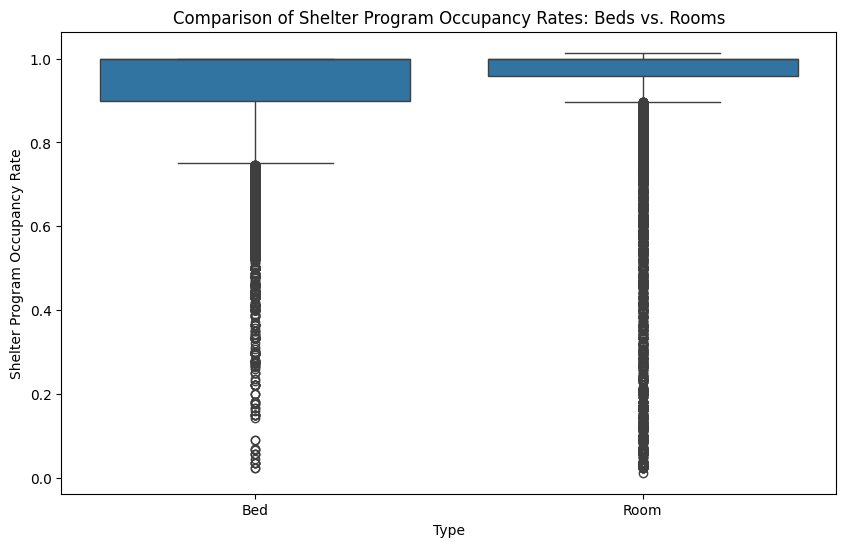

In [ ]:
# Prepare the data for plotting
beds_data['Type'] = 'Bed'
rooms_data['Type'] = 'Room'
combined_data = pd.concat([beds_data[['shelter_program_occupancy_rate', 'Type']], rooms_data[['shelter_program_occupancy_rate', 'Type']]])

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='shelter_program_occupancy_rate', data=combined_data)
plt.title('Comparison of Shelter Program Occupancy Rates: Beds vs. Rooms')
plt.xlabel('Type')
plt.ylabel('Shelter Program Occupancy Rate')
plt.show()

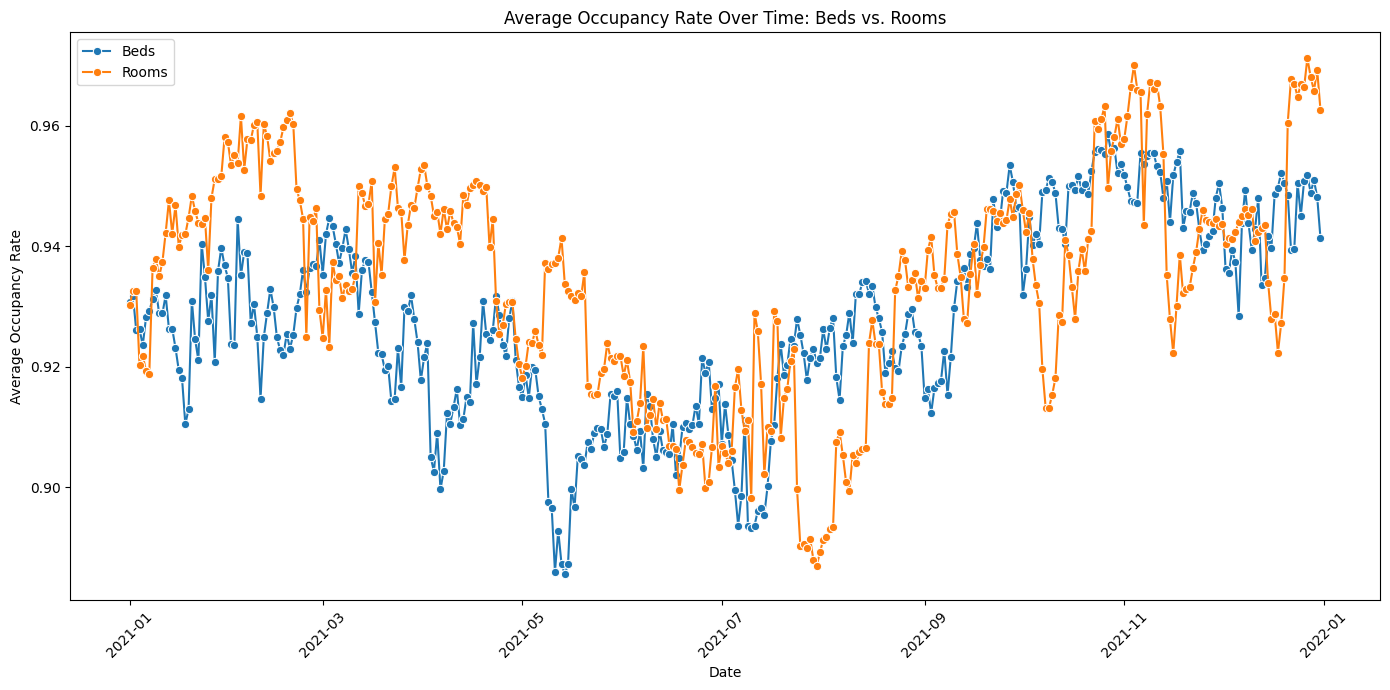

In [ ]:
# Ensure the OCCUPANCY_DATE columns in both DataFrames are in datetime format
beds_data['OCCUPANCY_DATE'] = pd.to_datetime(beds_data['OCCUPANCY_DATE'])
rooms_data['OCCUPANCY_DATE'] = pd.to_datetime(rooms_data['OCCUPANCY_DATE'])

# Calculate the average occupancy rate for each date for beds
average_beds_occupancy_over_time = beds_data.groupby('OCCUPANCY_DATE')['shelter_program_occupancy_rate'].mean().reset_index()

# Calculate the average occupancy rate for each date for rooms
average_rooms_occupancy_over_time = rooms_data.groupby('OCCUPANCY_DATE')['shelter_program_occupancy_rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))

# Plot line for beds
sns.lineplot(x='OCCUPANCY_DATE', y='shelter_program_occupancy_rate', data=average_beds_occupancy_over_time, label='Beds', marker='o')

# Plot line for rooms
sns.lineplot(x='OCCUPANCY_DATE', y='shelter_program_occupancy_rate', data=average_rooms_occupancy_over_time, label='Rooms', marker='o')

plt.title('Average Occupancy Rate Over Time: Beds vs. Rooms')
plt.xlabel('Date')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### **View the impact of different sectors on bed and room occupancy rates**

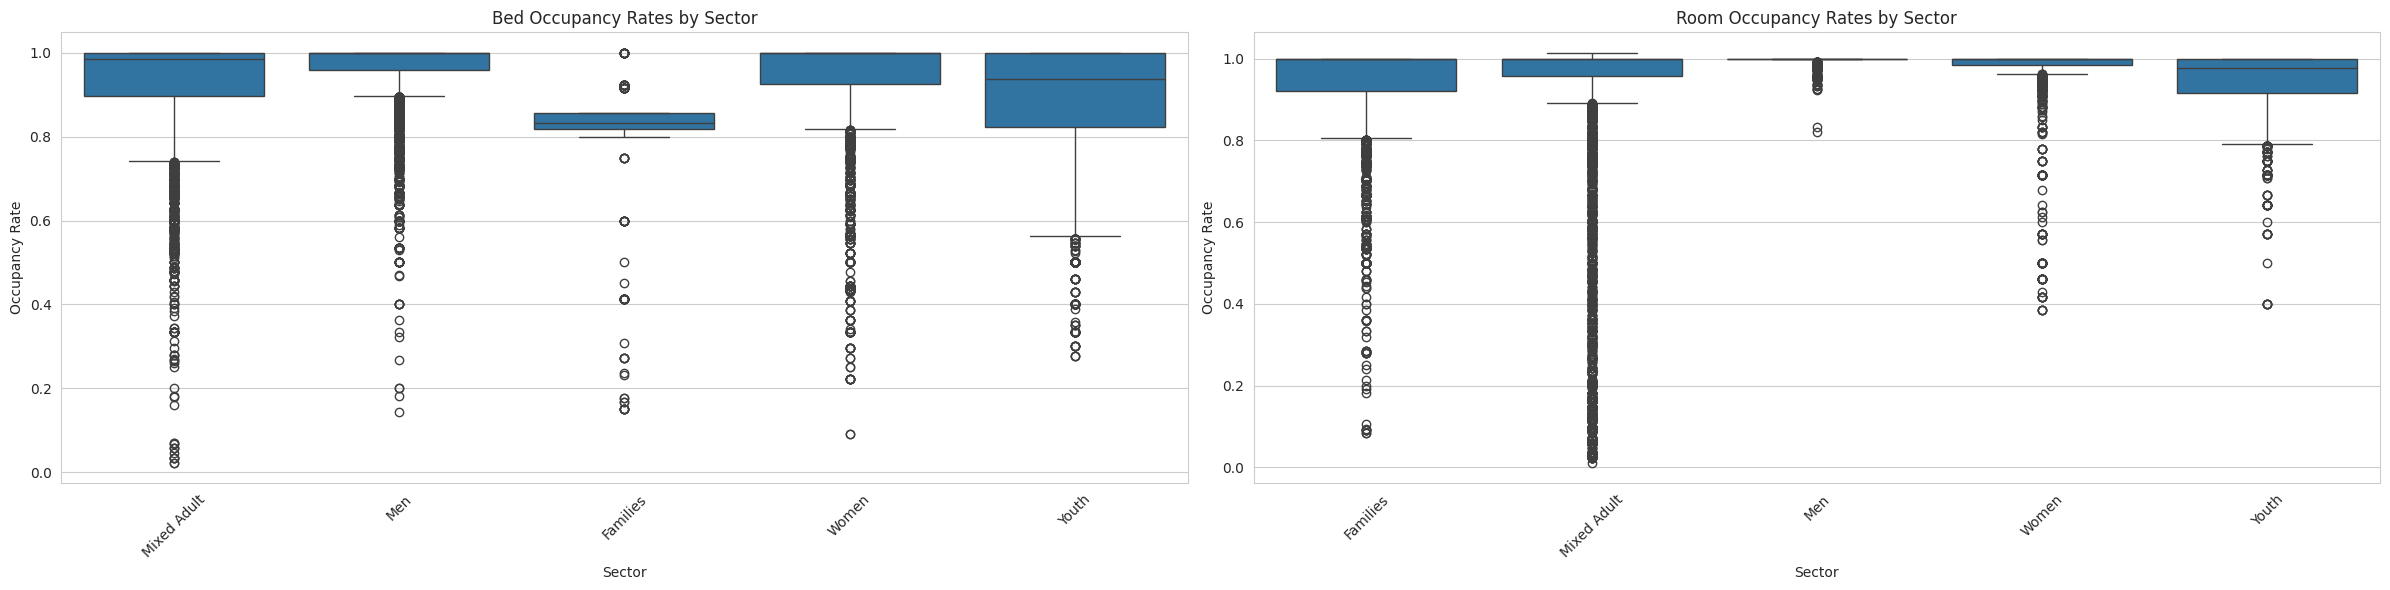

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Bed occupancy rates by sector on the first subplot
sns.boxplot(ax=axes[0], x='SECTOR', y='shelter_program_occupancy_rate', data=beds_data)
axes[0].set_title('Bed Occupancy Rates by Sector')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Occupancy Rate')
axes[0].tick_params(axis='x', rotation=45)

# Room occupancy rates by sector on the second subplot
sns.boxplot(ax=axes[1], x='SECTOR', y='shelter_program_occupancy_rate', data=rooms_data)
axes[1].set_title('Room Occupancy Rates by Sector')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Occupancy Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



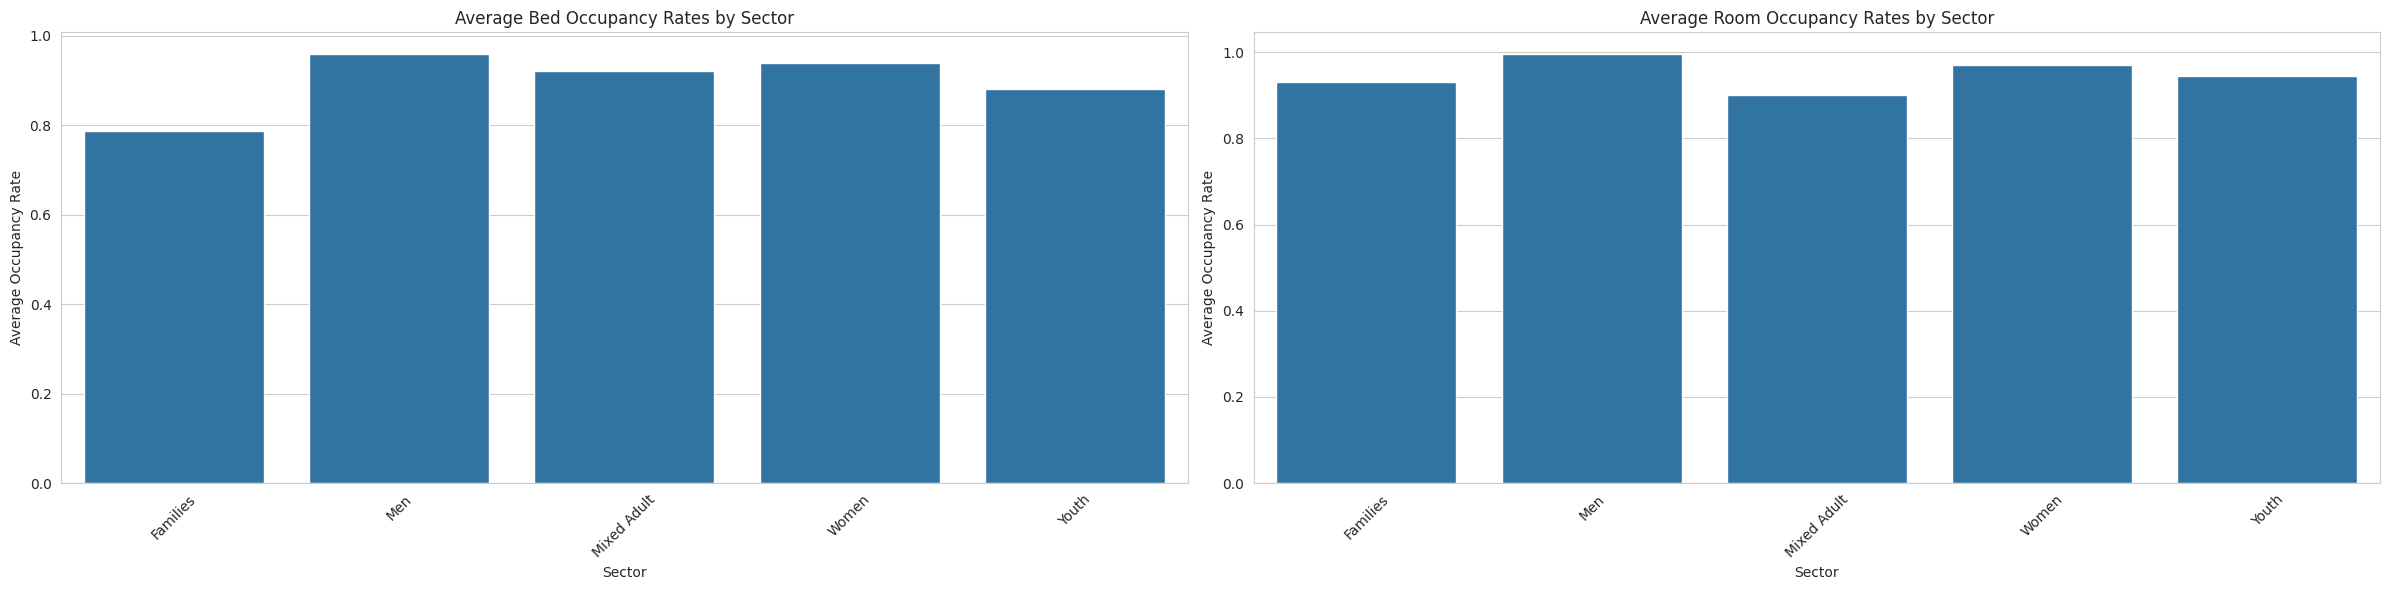

In [ ]:
# Calculate the average occupancy rate by sector for beds
average_beds_occupancy_by_sector = beds_data.groupby('SECTOR')['shelter_program_occupancy_rate'].mean().reset_index()

# Calculate the average occupancy rate by sector for rooms
average_rooms_occupancy_by_sector = rooms_data.groupby('SECTOR')['shelter_program_occupancy_rate'].mean().reset_index()

# Set up the matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plotting average occupancy rates for beds by sector on the first subplot
sns.barplot(ax=axes[0], x='SECTOR', y='shelter_program_occupancy_rate', data=average_beds_occupancy_by_sector)
axes[0].set_title('Average Bed Occupancy Rates by Sector')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Average Occupancy Rate')
axes[0].tick_params(axis='x', rotation=45)

# Plotting average occupancy rates for rooms by sector on the second subplot
sns.barplot(ax=axes[1], x='SECTOR', y='shelter_program_occupancy_rate', data=average_rooms_occupancy_by_sector)
axes[1].set_title('Average Room Occupancy Rates by Sector')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Average Occupancy Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **View the relationship between program model on occupancy rate on bed and room**

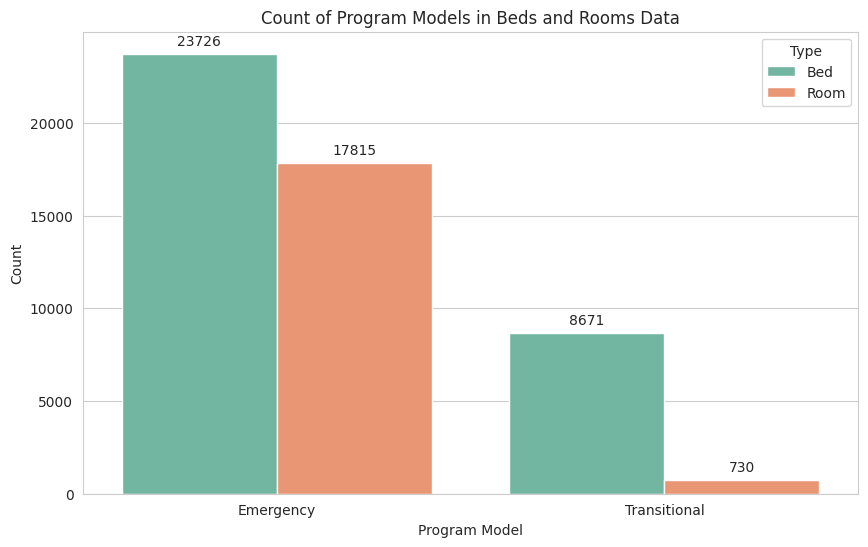

In [ ]:
# Prepare the data for plotting
beds_data['Type'] = 'Bed'
rooms_data['Type'] = 'Room'
combined_data = pd.concat([beds_data[['PROGRAM_MODEL', 'Type']], rooms_data[['PROGRAM_MODEL', 'Type']]])

# Filter for 'Emergency' and 'Transitional' program models only
filtered_data = combined_data[combined_data['PROGRAM_MODEL'].isin(['Emergency', 'Transitional'])]

# Create the plot
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='PROGRAM_MODEL', hue='Type', data=filtered_data, palette="Set2")

plt.title('Count of Program Models in Beds and Rooms Data')
plt.xlabel('Program Model')
plt.ylabel('Count')
plt.legend(title='Type')

# Annotate bars with counts, skipping those with a count of 0
for p in bar_plot.patches:
    if p.get_height() > 0:  # Check if the bar has a height greater than 0 before annotating
        bar_plot.annotate(f'{int(p.get_height())}',  # Text to display
                          (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                          ha='center', va='center',  # Alignment
                          xytext=(0, 9),  # Offset text by 9 points vertically
                          textcoords='offset points')

plt.show()



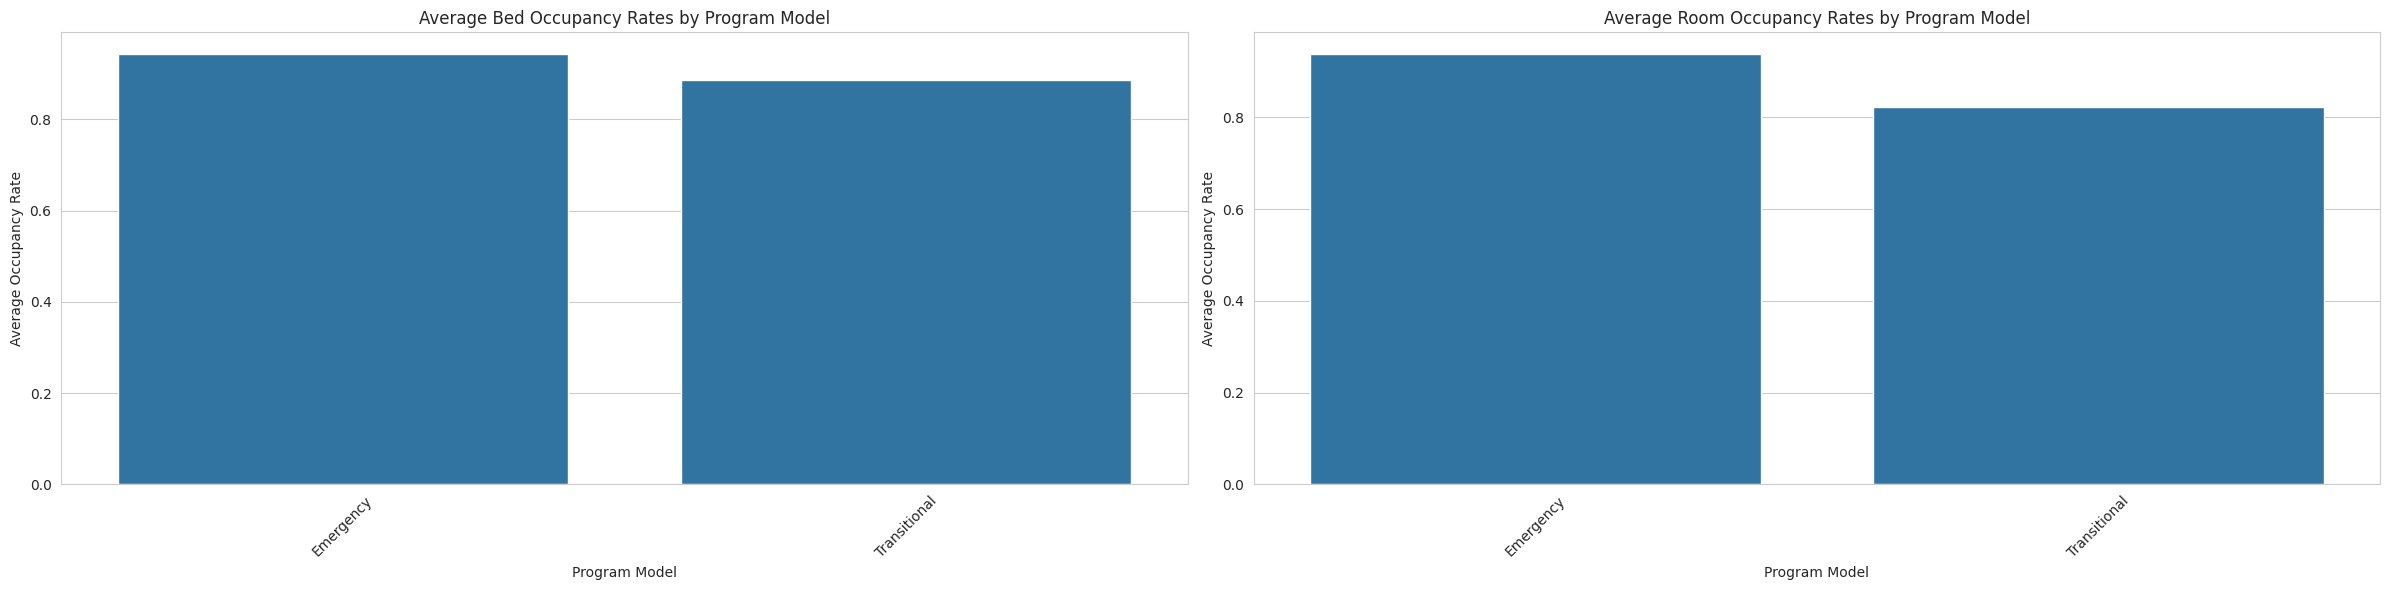

In [ ]:
# Calculate the average occupancy rate by program model for beds
average_beds_occupancy_by_model = beds_data.groupby('PROGRAM_MODEL')['shelter_program_occupancy_rate'].mean().reset_index()

# Calculate the average occupancy rate by program model for rooms
average_rooms_occupancy_by_model = rooms_data.groupby('PROGRAM_MODEL')['shelter_program_occupancy_rate'].mean().reset_index()

# Set up the matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plotting average occupancy rates by program model for beds on the first subplot
sns.barplot(ax=axes[0], x='PROGRAM_MODEL', y='shelter_program_occupancy_rate', data=average_beds_occupancy_by_model)
axes[0].set_title('Average Bed Occupancy Rates by Program Model')
axes[0].set_xlabel('Program Model')
axes[0].set_ylabel('Average Occupancy Rate')
axes[0].tick_params(axis='x', rotation=45)

# Plotting average occupancy rates by program model for rooms on the second subplot
sns.barplot(ax=axes[1], x='PROGRAM_MODEL', y='shelter_program_occupancy_rate', data=average_rooms_occupancy_by_model)
axes[1].set_title('Average Room Occupancy Rates by Program Model')
axes[1].set_xlabel('Program Model')
axes[1].set_ylabel('Average Occupancy Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




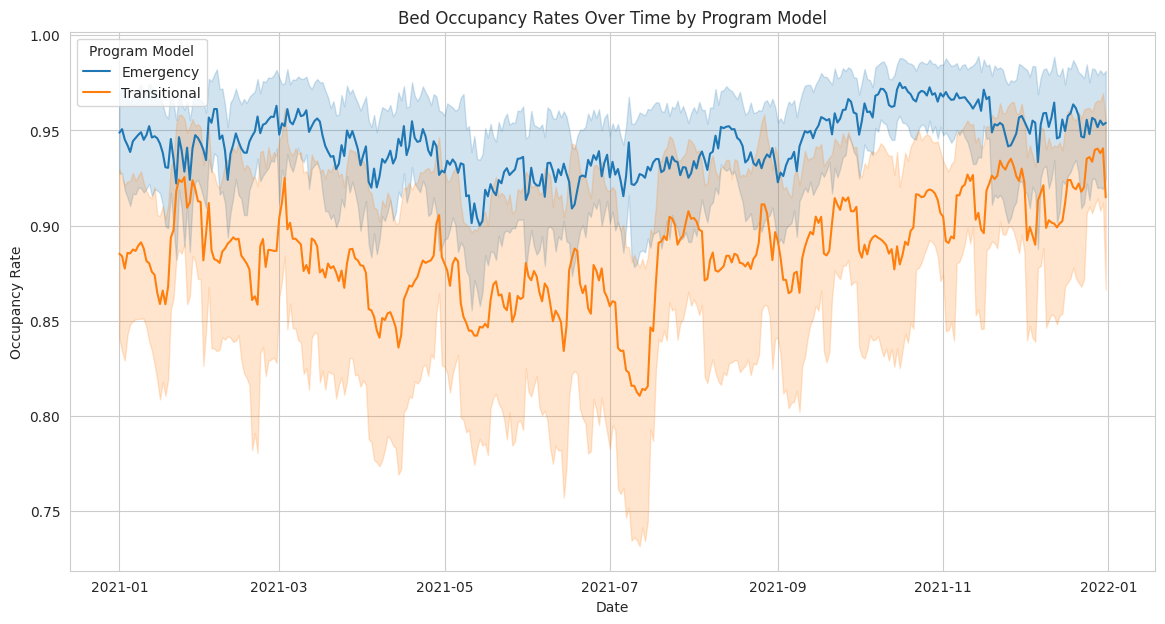

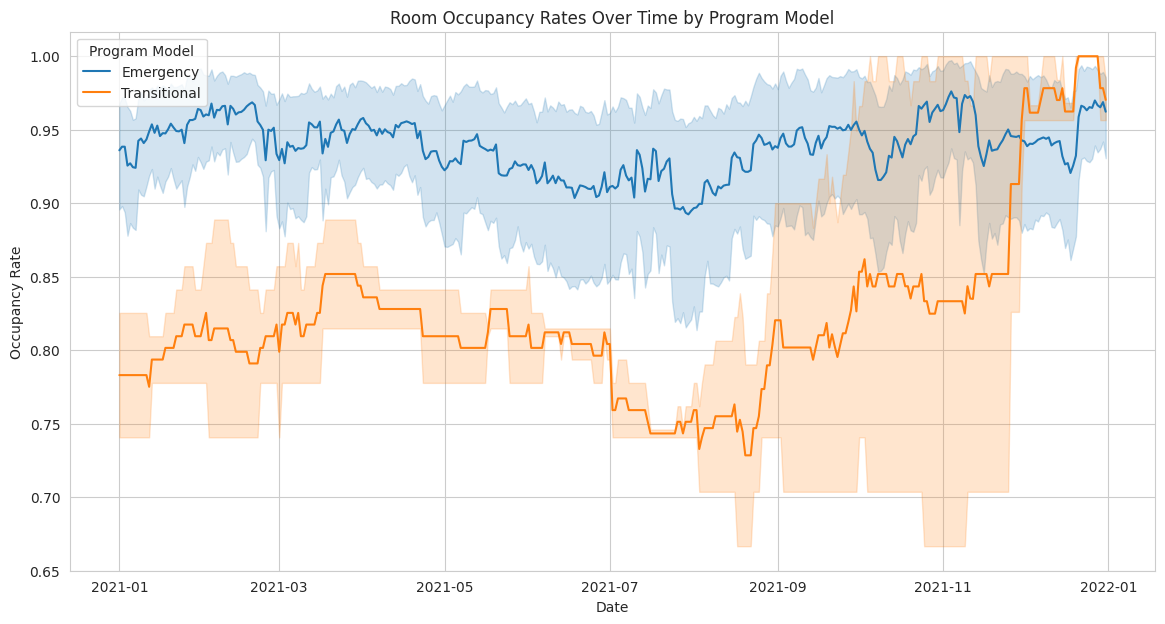

In [ ]:
# Time series plot of occupancy rates for beds by program model
plt.figure(figsize=(14, 7))
sns.lineplot(data=beds_data, x='OCCUPANCY_DATE', y='shelter_program_occupancy_rate', hue='PROGRAM_MODEL')
plt.title('Bed Occupancy Rates Over Time by Program Model')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.legend(title='Program Model')
plt.show()

# Time series plot of occupancy rates for rooms by program model
plt.figure(figsize=(14, 7))
sns.lineplot(data=rooms_data, x='OCCUPANCY_DATE', y='shelter_program_occupancy_rate', hue='PROGRAM_MODEL')
plt.title('Room Occupancy Rates Over Time by Program Model')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.legend(title='Program Model')
plt.show()
